# 10장 딥러닝 모델 설계하기  (2장 딥러닝의 핵심 미리 보기)

### 1. 환경 준비 

In [1]:
# 텐서플로 라이브러리 안에 있는 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense   

# 데이터를 다루는 데 필요한 라이브러리를 불러옵니다.
import numpy as np

### 2. 데이터 준비

In [2]:
# 준비된 수술 환자 데이터를 불러옵니다.
Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",")  
X = Data_set[:,0:16]    # 환자의 진찰 기록을 X로 지정합니다.
y = Data_set[:,16]      # 수술 1년 후 사망/생존 여부를 y로 지정합니다.

### 3. 구조 결정 

In [3]:
# 딥러닝 모델의 구조를 결정합니다.
model = Sequential()    # Sequential() 함수를 model로 선언해 놓고 model.add()라는 라인을 추가하면 새로운 층이 만들어짐
# model.add( )로 시작되는 라인이 두 개 있으므로 층을 두 개 가진 모델을 만든 것
# Dense라는 함수를 통해 구체적으로 그 구조가 결정
model.add(Dense(30, input_dim=16, activation='relu')) # Activation은 활성화 함수이다. relu
model.add(Dense(1, activation='sigmoid')) # 출력층
# 맨 마지막 층은 결과를 출력하는 ‘출력층’이 됨. 나머지는 모두 ‘은닉층’의 역할을 함
# 출력 값을 하나로 정해서 보여 주어야 하므로 출력층의 노드 수는 한 개 : 1
# 두개 중에 하나의 값을 가져 오는 것이므로 sigmoid함수를 사용


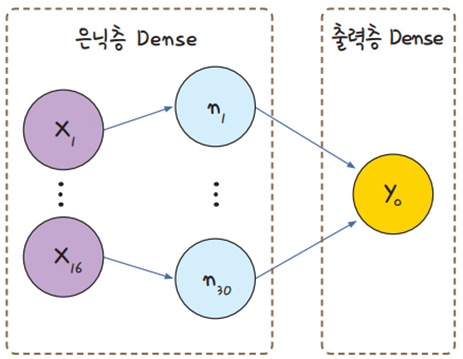

### 4. 모델 실행 

In [4]:
# 딥러닝 모델을 실행합니다.

# 손실 함수는 로지스틱 회귀에서 사용한 교차 엔트로피 오차(binary_crossentropy)
# 오차를 줄이기 위한 경사하강법을 Optimizer라함. Optimizer란에 adam을 적어 주는 것으로 실행할 준비가 됨
# metrics() 함수는 모델이 컴파일될 때 모델 수행의 결과를 나타내게끔 설정하는 부분
# accuracy라고 설정한 것은 학습셋에 대한 정확도에 기반해 결과를 출력하라는 의미( metrics=['accuracy’])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
history=model.fit(X, y, epochs=5, batch_size=16)
# model.fit()으로 시작하는 부분은 모델을 실제로 수행하는 부분
# 임의로 정해진 가중치에서 몇번을 반복할 것인지가 epochs(‘에포크’라고 읽음)라고 함
# epochs=5는 임의로 정해진 가중치로부터 5번 반복하라는 의미
# batch_size는 샘플을 한 번에 몇 개씩 처리할지 정하는 부분으로 batch_size=16은 전체 470개의 샘플을 16개씩 끊어서 집어넣으라는 의미
# batch_size가 너무 크면 학습 속도가 느려지고, 너무 작으면 각 실행 값의 편차가 생겨서 전체 결괏값이 불안정해질 수 있음
# 자신의 컴퓨터 메모리가 감당할 만큼의 batch_size를 찾아 설정해 주는 것이 좋음

Epoch 1/5
30/30 [==============================] - 1s 2ms/step - loss: 0.4955 - accuracy: 0.8426
Epoch 2/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.8511
Epoch 3/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.8511
Epoch 4/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4613 - accuracy: 0.8511
Epoch 5/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.8511


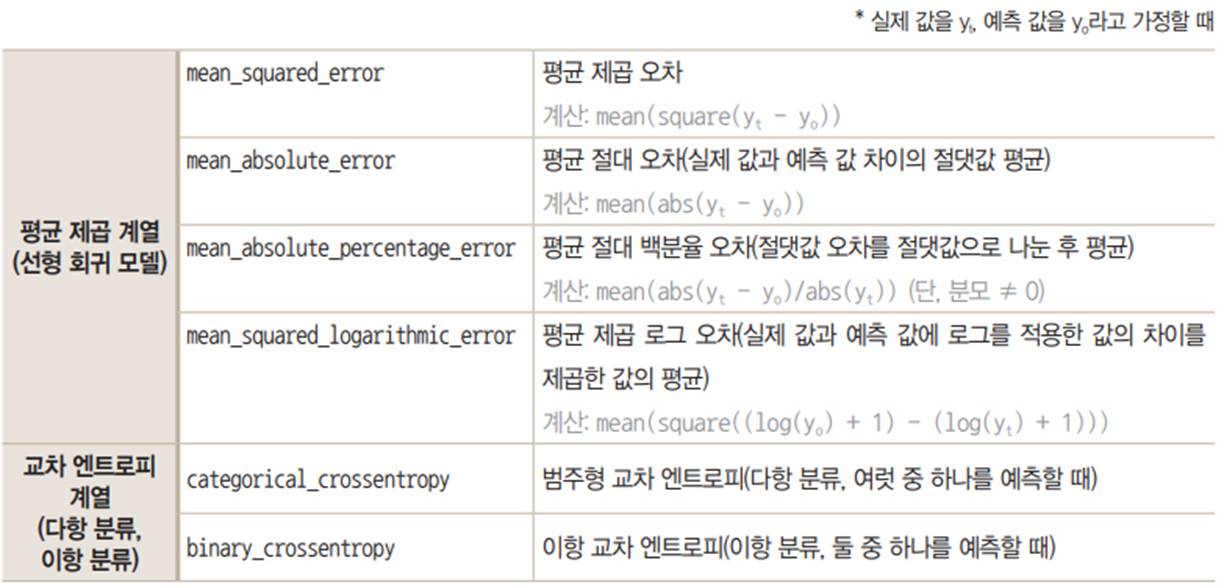